In [4]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# Configurando estilo dos gráficos
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 5)

In [8]:
df = pd.read_json('/content/_position__202505242231.json')
# Muestra las primeras 5 entradas de la columna 'position'
print(df['position'].head().to_string())

0    {'id': 848, 'symbol': 'DOGEUSDT', 'direction':...
1    {'id': 877, 'symbol': 'OMUSDT', 'direction': '...
2    {'id': 786, 'symbol': 'SUSDT', 'direction': 'L...
3    {'id': 957, 'symbol': 'ACTUSDT', 'direction': ...
4    {'id': 971, 'symbol': '1000RATSUSDT', 'directi...


In [9]:
# Muestra el tipo de dato de la primera entrada en la columna 'position'
print(type(df['position'][0]))


<class 'dict'>


In [10]:
# Muestra todas las claves del primer diccionario en la columna 'position'
if isinstance(df['position'][0], dict):
    print(df['position'][0].keys())
else:
    print("La primera entrada no es un diccionario.")

dict_keys(['id', 'symbol', 'direction', 'entryPrice', 'stopLoss', 'status', 'exitPrice', 'profitPercentage', 'currentTraders', 'closeReason', 'openedAt', 'closedAt', 'cooldown', 'cooldownUntil', 'forcePercentage', 'riskScore', 'atrValue', 'tp1', 'tp2', 'tp3', 'slPercentage', 'tp1Percentage', 'tp2Percentage', 'tp3Percentage', 'tp1Size', 'tp2Size', 'tp3Size', 'hitTp1', 'hitTp2', 'tp1ExitPrice', 'tp2ExitPrice', 'tp1ProfitPercentage', 'tp2ProfitPercentage', 'finalProfitPercentage', 'isGolden', 'traderId', 'openByAdmin', 'isSignalFromTelegram', 'macdSignal', 'ema50', 'adx14', 'marketVolatilityIndex', 'breakoutConfidence', 'trendConfidence', 'rsiValue', 'macdValue', 'ema10', 'score', 'macdHistogram', 'stochRsiK', 'stochRsiD', 'ema20', 'ema200', 'supertrendValue', 'supertrendDirection', 'bollingerUpper', 'bollingerMiddle', 'bollingerLower', 'bollingerWidth', 'bollingerPercentB', 'dmiPlus', 'dmiMinus', 'obv', 'volumeEMA', 'buyVolume', 'sellVolume', 'volumeRatio', 'hasRecentHigherHigh', 'hasRec

In [11]:
# Muestra la primera entrada completa de la columna 'position'
import json
print(json.dumps(df['position'][0], indent=4))

{
    "id": 848,
    "symbol": "DOGEUSDT",
    "direction": "SHORT",
    "entryPrice": 0.20622000000000001,
    "stopLoss": 0.2154999,
    "status": "CLOSED",
    "exitPrice": 0.20538,
    "profitPercentage": null,
    "currentTraders": 1,
    "closeReason": "TRADERS_EXIT",
    "openedAt": "2025-02-25T01:45:15.622Z",
    "closedAt": "2025-02-26T21:53:08.013Z",
    "cooldown": true,
    "cooldownUntil": "2025-02-27T03:53:08.013Z",
    "forcePercentage": 32.47,
    "riskScore": 6.65,
    "atrValue": 3.324856,
    "tp1": 0.2000334,
    "tp2": 0.1938468,
    "tp3": 0.1876602,
    "slPercentage": 4.5,
    "tp1Percentage": 3.0,
    "tp2Percentage": 6.0,
    "tp3Percentage": 9.0,
    "tp1Size": 3.0,
    "tp2Size": 6.0,
    "tp3Size": 9.0,
    "hitTp1": true,
    "hitTp2": false,
    "tp1ExitPrice": 0.19999,
    "tp2ExitPrice": null,
    "tp1ProfitPercentage": 3.02,
    "tp2ProfitPercentage": null,
    "finalProfitPercentage": 1.06,
    "isGolden": false,
    "traderId": "TELEGRAM_SIGNAL",
   

In [12]:
# Normalizar la columna 'position'
df_flat = pd.json_normalize(df['position'])

# Mostrar las primeras filas del nuevo DataFrame aplanado
print(df_flat.head())

# Mostrar la información general del nuevo DataFrame (columnas y tipos de datos)
print(df_flat.info())

    id        symbol direction  entryPrice  stopLoss  status  exitPrice  \
0  848      DOGEUSDT     SHORT     0.20622  0.215500  CLOSED    0.20538   
1  877        OMUSDT     SHORT     7.66967  8.014805  CLOSED    7.25860   
2  786         SUSDT      LONG     0.83260  0.795133  CLOSED    0.89870   
3  957       ACTUSDT      LONG     0.20901  0.199605  CLOSED    0.20339   
4  971  1000RATSUSDT      LONG     0.02571  0.024553  CLOSED    0.02814   

  profitPercentage  currentTraders   closeReason  ... isGoodDirection score2  \
0             None               1  TRADERS_EXIT  ...            True   5.39   
1             None               1  TRADERS_EXIT  ...            True  11.48   
2             None               1           TP3  ...            True   6.60   
3             None               1  TRADERS_EXIT  ...            True   7.70   
4             None               1           TP3  ...            True   6.00   

   shouldWork isOpportunity  tvRecommendation  tvSummary  tvInterval

In [13]:
# --- Paso 2: Limpieza y preparación de datos ---

# 1. Convertir columnas de fecha/hora a datetime
datetime_cols = ['openedAt', 'closedAt', 'cooldownUntil']
for col in datetime_cols:
    df_flat[col] = pd.to_datetime(df_flat[col], errors='coerce') # 'coerce' convertirá errores en NaT (Not a Time)

# 2. Analizar y considerar `profitPercentage` (ya notamos que es todo nulo)
# Si no vamos a usarla y está toda nula, podemos incluso eliminarla para limpiar el DataFrame
# df_flat = df_flat.drop(columns=['profitPercentage'])

# 3. Rellenar valores nulos en `finalProfitPercentage` para análisis, o enfocarnos en no-nulos
# Para el análisis de rendimiento de posiciones cerradas, nos interesan los valores reales.
# Si quisiéramos usar esta columna para el cálculo en tiempo real, necesitaríamos una estrategia para los NaNs.
# Por ahora, simplemente notamos su existencia.

# Opcional: Convertir columnas booleanas con objetos/NaN a bool si es necesario (ej: hasRecentHigherHigh)
# Estas columnas como 'hasRecentHigherHigh' y 'hasRecentLowerLow' son object y tienen nulls.
# Vamos a convertirlas a booleanas. Los NaN se convertirán a False, lo cual es un comportamiento razonable si no hay información.
bool_cols_to_convert = ['hasRecentHigherHigh', 'hasRecentLowerLow']
for col in bool_cols_to_convert:
    df_flat[col] = df_flat[col].astype(bool) # Esto convertirá True/False a bool, y None/NaN a False

# Mostrar información actualizada del DataFrame
print("--- DataFrame después de la limpieza inicial ---")
print(df_flat.info())

# Mostrar algunas de las columnas de fecha/hora para verificar la conversión
print("\n--- Fechas convertidas (primeras 5 filas) ---")
print(df_flat[['openedAt', 'closedAt', 'cooldownUntil']].head())

--- DataFrame después de la limpieza inicial ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2153 entries, 0 to 2152
Data columns (total 80 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   id                     2153 non-null   int64              
 1   symbol                 2153 non-null   object             
 2   direction              2153 non-null   object             
 3   entryPrice             2153 non-null   float64            
 4   stopLoss               2153 non-null   float64            
 5   status                 2153 non-null   object             
 6   exitPrice              2141 non-null   float64            
 7   profitPercentage       0 non-null      object             
 8   currentTraders         2153 non-null   int64              
 9   closeReason            2141 non-null   object             
 10  openedAt               2153 non-null   datetime64[ns, UTC]
 11  closedA

In [14]:
# Asegurarse de que las columnas de fecha/hora estén en formato datetime
datetime_cols = ['openedAt', 'closedAt', 'cooldownUntil']
for col in datetime_cols:
    df_flat[col] = pd.to_datetime(df_flat[col], errors='coerce')

# Extraer el día de la semana (0 = Lunes, 6 = Domingo)
df_flat['day_of_week'] = df_flat['openedAt'].dt.dayofweek

# Asegurarse de que finalProfitPercentage sea numérico y manejar nulos
# Para calcular la efectividad, solo consideraremos los trades donde el profitPercentage final sea conocido.
# Rellenaremos los NaNs con 0 para evitar errores en cálculos, pero sabiendo que son datos faltantes.
# O, mejor aún, para evaluar, filtraremos solo los trades CERRADOS con profit.
df_flat['finalProfitPercentage'] = pd.to_numeric(df_flat['finalProfitPercentage'], errors='coerce')

# Para la evaluación, nos centraremos en las posiciones que han sido cerradas y tienen un profitPercentage final.
# Creamos un DataFrame solo con posiciones cerradas para un análisis de rendimiento preciso.
df_closed_positions = df_flat[df_flat['status'] == 'CLOSED'].copy()

# Opcional: Eliminar filas donde finalProfitPercentage es NaN si solo queremos evaluar trades con resultado conocido
df_closed_positions.dropna(subset=['finalProfitPercentage'], inplace=True)

print("--- DataFrame de Posiciones Cerradas preparado ---")
print(df_closed_positions[['symbol', 'openedAt', 'closedAt', 'finalProfitPercentage', 'day_of_week']].head())
print(f"Número de posiciones cerradas para análisis: {len(df_closed_positions)}")

--- DataFrame de Posiciones Cerradas preparado ---
         symbol                         openedAt  \
0      DOGEUSDT 2025-02-25 01:45:15.622000+00:00   
1        OMUSDT 2025-02-25 14:15:14.778000+00:00   
2         SUSDT 2025-02-23 12:06:36.746000+00:00   
3       ACTUSDT 2025-02-27 20:30:36.970000+00:00   
4  1000RATSUSDT 2025-02-28 07:44:34.225000+00:00   

                          closedAt  finalProfitPercentage  day_of_week  
0 2025-02-26 21:53:08.013000+00:00                   1.06            1  
1 2025-02-26 21:53:10.443000+00:00                   5.25            1  
2 2025-02-23 18:24:30.376000+00:00                   7.94            6  
3 2025-02-27 20:58:41.180000+00:00                  -2.69            3  
4 2025-02-28 10:39:25.257000+00:00                   9.45            4  
Número de posiciones cerradas para análisis: 2141


In [15]:
# --- Paso 3: Definir y Evaluar Estrategias de Entrada (para dirección LONG) ---

# Nos enfocaremos en las posiciones que se abrieron con una dirección 'LONG'.
df_long_closed = df_closed_positions[df_closed_positions['direction'] == 'LONG'].copy()

print("\n--- Evaluación de Estrategias de Entrada (solo para LONG) ---")

strategies = {
    # Estrategias basadas en señales preexistentes/compuestas
    'Estrategia_1_isOpportunity': lambda df: df['isOpportunity'] == True,
    'Estrategia_2_shouldWork': lambda df: df['shouldWork'] == True,
    'Estrategia_3_GoodDir_ShouldWork': lambda df: (df['isGoodDirection'] == True) & (df['shouldWork'] == True),
    'Estrategia_4_ScoreHigh': lambda df: df['score'] > 7.0, # Umbral arbitrario, podemos ajustarlo
    'Estrategia_5_Score2High': lambda df: df['score2'] > 8.0, # Umbral arbitrario, podemos ajustarlo

    # Estrategias basadas en indicadores técnicos clave
    'Estrategia_6_RSI_Oversold': lambda df: df['rsiValue'] < 30,
    'Estrategia_7_MACD_Bullish': lambda df: df['macdHistogram'] > 0,
    'Estrategia_8_EMA_Cross_ShortTerm': lambda df: (df['ema10'] > df['ema20']), # EMA10 sobre EMA20
    'Estrategia_9_Supertrend_Up': lambda df: df['supertrendDirection'] == 'UP',
    'Estrategia_10_Bollinger_BottomReversal': lambda df: (df['bollingerPercentB'] < 0.2) & (df['rsiValue'] < 40), # Precio cerca de banda inferior
    'Estrategia_11_Volume_IncreasedBuy': lambda df: df['buyVolume'] > df['sellVolume'], # Más volumen de compra que venta
    'Estrategia_12_ADX_TrendStrength': lambda df: (df['adx14'] > 25) & (df['dmiPlus'] > df['dmiMinus']), # Fuerte tendencia alcista

    # Estrategias Combinadas (ejemplos)
    'Estrategia_13_Compound_1': lambda df: (df['isOpportunity'] == True) & (df['rsiValue'] < 40) & (df['macdHistogram'] > 0),
    'Estrategia_14_Compound_2': lambda df: (df['shouldWork'] == True) & (df['ema10'] > df['ema20']) & (df['supertrendDirection'] == 'UP'),
    'Estrategia_15_RiskScore_Low': lambda df: df['riskScore'] < 5.0, # Intentar entrar en trades de bajo riesgo
    'Estrategia_16_TrendConf_High': lambda df: df['trendConfidence'] > 60.0, # Entrar solo con alta confianza en la tendencia
}

results = {}

for name, strategy_func in strategies.items():
    # Aplicar la estrategia para obtener las señales
    # Es importante usar el DataFrame original (df_flat) o al menos uno que incluya trades no cerrados
    # para generar las SEÑALES, ya que una señal de entrada se genera antes de que un trade se cierre.
    # Pero para EVALUAR el RENDIMIENTO, usaremos df_long_closed.

    # Aquí estamos simulando que estas estrategias *habrían generado* una señal de entrada.
    # Para la evaluación de rendimiento, filtramos las posiciones ya cerradas que cumplen la señal.

    # Identificar los IDs de las posiciones que cumplen la estrategia de entrada en el DataFrame completo (df_flat)
    signal_ids = df_flat[strategy_func(df_flat) & (df_flat['direction'] == 'LONG')]['id']

    # Filtrar las posiciones *cerradas* que activaron esta señal de entrada
    trades_with_signal = df_long_closed[df_long_closed['id'].isin(signal_ids)].copy()

    total_trades = len(trades_with_signal)

    if total_trades > 0:
        profitable_trades = trades_with_signal[trades_with_signal['finalProfitPercentage'] > 0]
        num_profitable = len(profitable_trades)

        profit_percentage = (num_profitable / total_trades) * 100
        avg_profit = trades_with_signal['finalProfitPercentage'].mean()

        # Calcular el promedio de pérdida (solo para trades con pérdida)
        losing_trades = trades_with_signal[trades_with_signal['finalProfitPercentage'] < 0]
        avg_loss = losing_trades['finalProfitPercentage'].mean() if len(losing_trades) > 0 else 0

        # Ratio Riesgo/Recompensa promedio (muy simplificado, solo basado en promedio de profit/loss)
        # Un ratio positivo significa que en promedio ganamos más de lo que perdemos.
        risk_reward_ratio = abs(avg_profit / avg_loss) if avg_loss != 0 else float('inf') # Inf si no hay pérdidas

        results[name] = {
            'Total Señales (LONG)': len(signal_ids), # Número de veces que la señal se activó (pueden ser trades que no se cerraron aún)
            'Trades Cerrados con Señal': total_trades, # Número de trades que se cerraron y activaron esta señal
            'Trades Rentables': num_profitable,
            'Porcentaje de Acierto (%)': round(profit_percentage, 2),
            'Ganancia Promedio (%)': round(avg_profit, 2),
            'Pérdida Promedio (%)': round(avg_loss, 2),
            'Ratio Riesgo/Recompensa (Avg)': round(risk_reward_ratio, 2) if risk_reward_ratio != float('inf') else 'Inf'
        }
    else:
        results[name] = {
            'Total Señales (LONG)': len(signal_ids),
            'Trades Cerrados con Señal': 0,
            'Trades Rentables': 0,
            'Porcentaje de Acierto (%)': 0.0,
            'Ganancia Promedio (%)': 0.0,
            'Pérdida Promedio (%)': 0.0,
            'Ratio Riesgo/Recompensa (Avg)': 0.0
        }

# Convertir los resultados a un DataFrame para una mejor visualización
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df.index.name = 'Estrategia'

# Ordenar por Ganancia Promedio y luego Porcentaje de Acierto
results_df_sorted = results_df.sort_values(by=['Ganancia Promedio (%)', 'Porcentaje de Acierto (%)'], ascending=[False, False])

print("\n--- Resumen de Rendimiento de las Estrategias de Entrada (LONG) ---")
print(results_df_sorted.to_string())


--- Evaluación de Estrategias de Entrada (solo para LONG) ---

--- Resumen de Rendimiento de las Estrategias de Entrada (LONG) ---
                                        Total Señales (LONG)  Trades Cerrados con Señal  Trades Rentables  Porcentaje de Acierto (%)  Ganancia Promedio (%)  Pérdida Promedio (%)  Ratio Riesgo/Recompensa (Avg)
Estrategia                                                                                                                                                                                                      
Estrategia_1_isOpportunity                               294                        291               174                      59.79                   1.30                 -3.99                           0.33
Estrategia_3_GoodDir_ShouldWork                          750                        749               427                      57.01                   1.28                 -3.83                           0.33
Estrategia_2_shouldWork         

In [16]:
# --- Paso 4: Influencia del Día de la Semana ---

print("\n--- Análisis por Día de la Semana para Estrategias Seleccionadas ---")

# Selecciona las estrategias que te parezcan más prometedoras de la tabla anterior
# Puedes elegir las top 3 o 5, o cualquier otra que te interese.
# Por ejemplo, tomemos la estrategia con la mayor "Ganancia Promedio (%)"
top_strategy_name = results_df_sorted.index[0]
top_strategy_func = strategies[top_strategy_name]

print(f"\nAnalizando la estrategia: {top_strategy_name}")

# Filtrar trades que activaron la estrategia top y que son LONG y cerrados
signal_ids_top_strategy = df_flat[top_strategy_func(df_flat) & (df_flat['direction'] == 'LONG')]['id']
trades_top_strategy = df_long_closed[df_long_closed['id'].isin(signal_ids_top_strategy)].copy()

if len(trades_top_strategy) > 0:
    # Agrupar por día de la semana y calcular métricas
    daily_performance = trades_top_strategy.groupby('day_of_week')['finalProfitPercentage'].agg(
        total_trades='count',
        avg_profit='mean',
        positive_trades=lambda x: (x > 0).sum()
    ).reset_index()

    daily_performance['profit_percentage'] = (daily_performance['positive_trades'] / daily_performance['total_trades']) * 100

    # Mapear el número del día de la semana a nombres
    day_names = {0: 'Lunes', 1: 'Martes', 2: 'Miércoles', 3: 'Jueves', 4: 'Viernes', 5: 'Sábado', 6: 'Domingo'}
    daily_performance['day_name'] = daily_performance['day_of_week'].map(day_names)

    print(daily_performance[['day_name', 'total_trades', 'avg_profit', 'profit_percentage']].sort_values('avg_profit', ascending=False).to_string())
else:
    print(f"No hay trades cerrados para la estrategia '{top_strategy_name}' para analizar por día de la semana.")


--- Análisis por Día de la Semana para Estrategias Seleccionadas ---

Analizando la estrategia: Estrategia_1_isOpportunity
    day_name  total_trades  avg_profit  profit_percentage
2  Miércoles            47    2.912766          76.595745
3     Jueves            28    2.310714          67.857143
5     Sábado            43    1.620465          65.116279
1     Martes            70    1.103714          55.714286
0      Lunes            27    0.365926          55.555556
4    Viernes            46    0.314348          50.000000
6    Domingo            30    0.179333          46.666667



--- Análisis Detallado de Rendimiento para la Estrategia_1_isOpportunity ---

--- 5.1 Resultados por Día de la Semana ---


<ipython-input-21-3af5a7aeb39d>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_name', y='avg_profit', data=daily_performance_vis, palette='viridis')


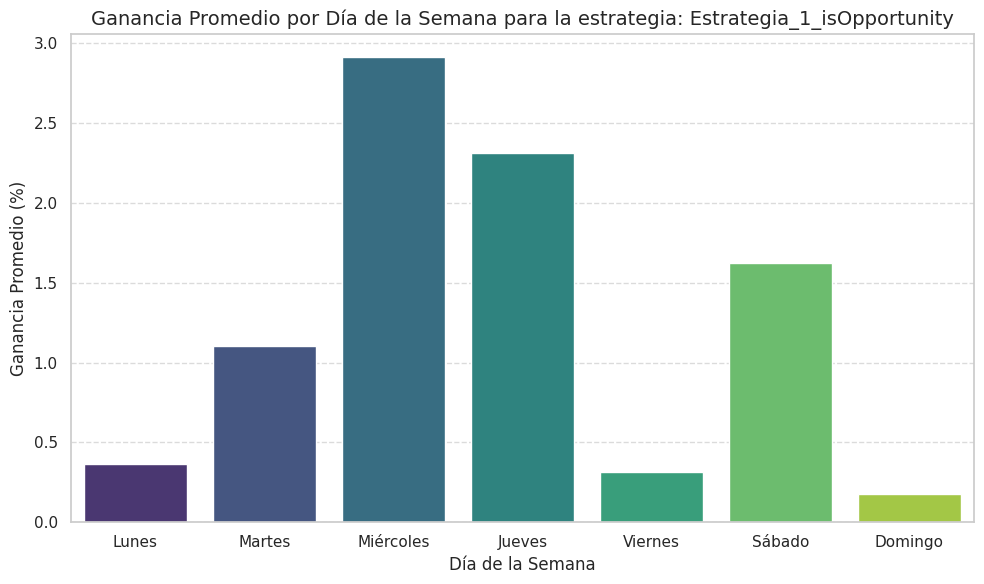

<ipython-input-21-3af5a7aeb39d>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='day_name', y='finalProfitPercentage',


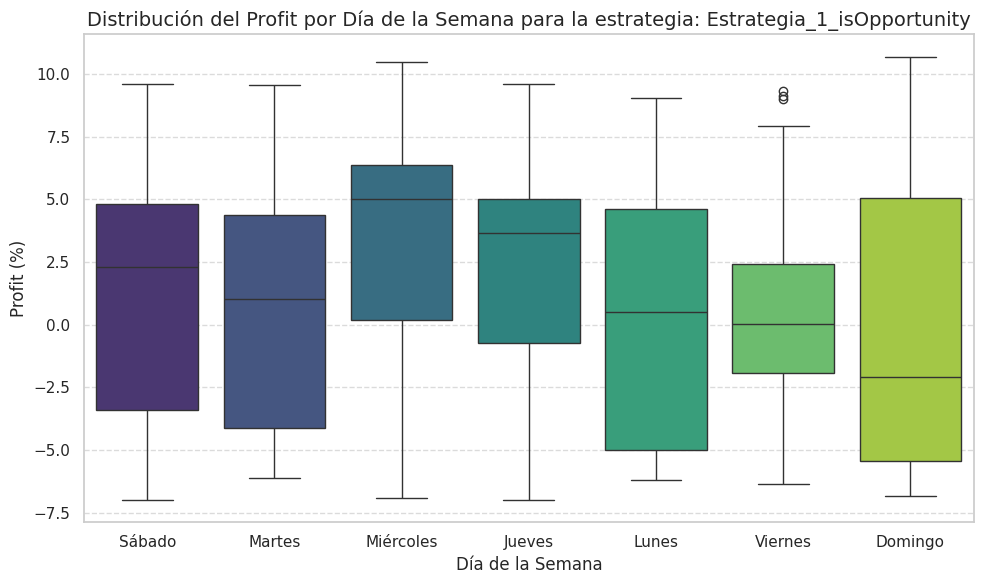


Rendimiento por Día de la Semana (Estrategia_1_isOpportunity):
 day_name  avg_profit  total_trades
    Lunes    0.365926            27
   Martes    1.103714            70
Miércoles    2.912766            47
   Jueves    2.310714            28
  Viernes    0.314348            46
   Sábado    1.620465            43
  Domingo    0.179333            30

Los días óptimos identificados son: Miércoles, Jueves

--- 5.2 Resultados por Hora del Día (Solo para Miércoles y Jueves) ---


<ipython-input-21-3af5a7aeb39d>:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='open_hour', y='avg_profit', data=hourly_performance_best_days, palette='coolwarm')


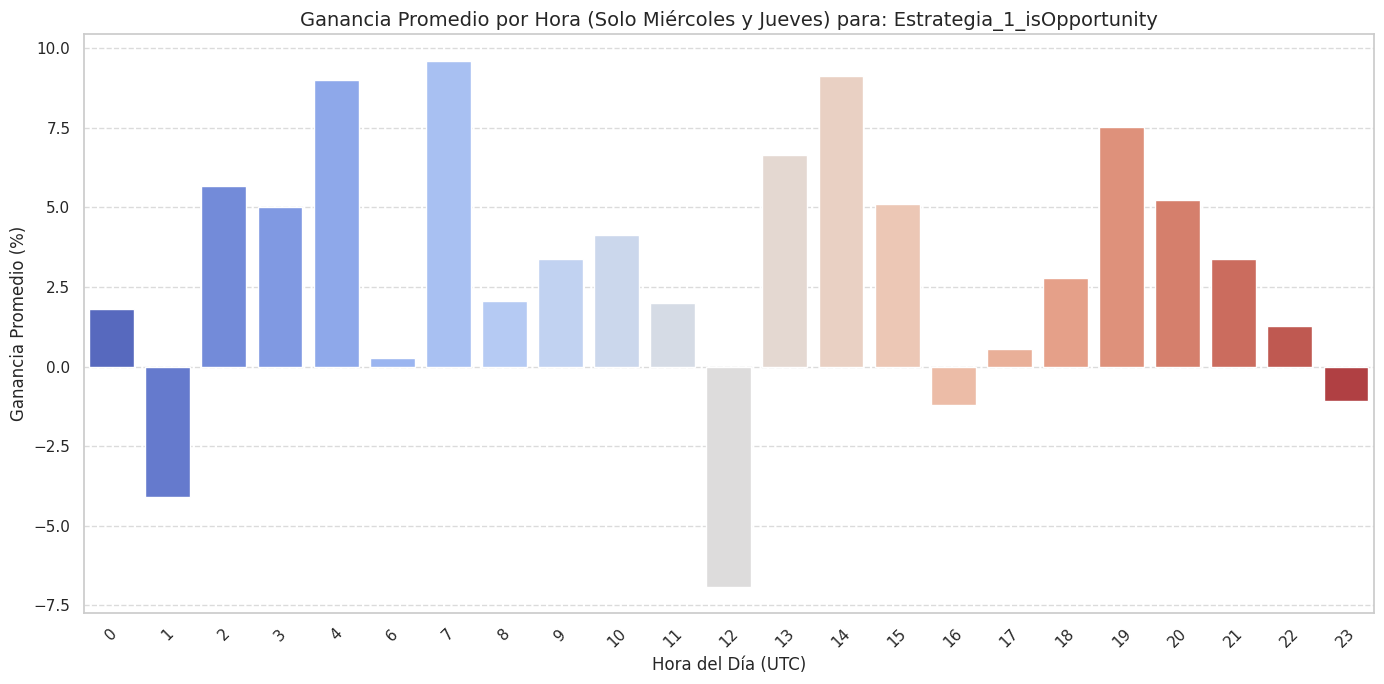

<ipython-input-21-3af5a7aeb39d>:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='open_hour', y='finalProfitPercentage', data=trades_best_days, palette='coolwarm')


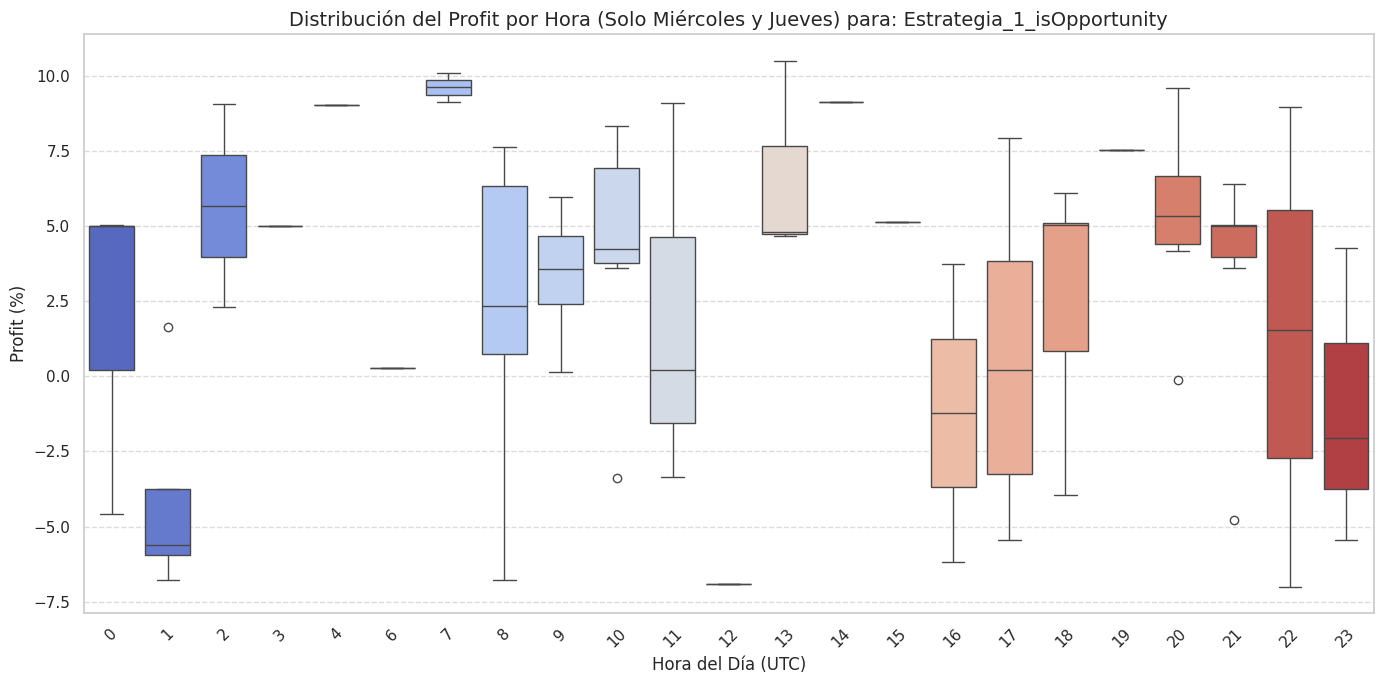


Rendimiento por Hora del Día (Miércoles y Jueves):
 open_hour  avg_profit  total_trades
         0    1.813333             3
         1   -4.087500             4
         2    5.675000             2
         3    5.000000             1
         4    9.010000             1
         6    0.260000             1
         7    9.615000             2
         8    2.056000             5
         9    3.373333             6
        10    4.126667             6
        11    1.983333             3
        12   -6.920000             1
        13    6.650000             3
        14    9.130000             1
        15    5.120000             1
        16   -1.225000             2
        17    0.550000             7
        18    2.796667             6
        19    7.540000             1
        20    5.221667             6
        21    3.376667             6
        22    1.262500             4
        23   -1.070000             3

Las horas óptimas identificadas dentro de los mejores días 

In [21]:
import os # Importar el módulo os

# --- Paso 5: Visualizar el rendimiento de la mejor estrategia y sus optimizaciones temporales ---

print("\n--- Análisis Detallado de Rendimiento para la Estrategia_1_isOpportunity ---")

# --- Preparación inicial de la estrategia y los datos ---
strategy_name = 'Estrategia_1_isOpportunity'

# Asegúrate de que 'strategies' es un diccionario que contiene tu función para la estrategia
# y que 'df_flat' y 'df_long_closed' están disponibles desde pasos anteriores.
# 'df_flat' debe contener la columna 'isOpportunity' y 'direction'.
# 'df_long_closed' debe contener los trades ya filtrados por 'LONG' y 'CLOSED' y 'openedAt'.
strategy_func = strategies[strategy_name]

# Filtrar trades que activaron la Estrategia_1_isOpportunity (que son LONG y cerrados)
signal_ids_vis = df_flat[strategy_func(df_flat) & (df_flat['direction'] == 'LONG')]['id']
trades_to_visualize = df_long_closed[df_long_closed['id'].isin(signal_ids_vis)].copy()

# Crear la carpeta 'images' si no existe
output_dir = 'images'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Directorio '{output_dir}' creado para guardar gráficos.")


if len(trades_to_visualize) > 0:
    # --- Añadir columnas temporales para el análisis ---
    trades_to_visualize['day_of_week'] = trades_to_visualize['openedAt'].dt.dayofweek
    day_names_map = {0: 'Lunes', 1: 'Martes', 2: 'Miércoles', 3: 'Jueves', 4: 'Viernes', 5: 'Sábado', 6: 'Domingo'}
    trades_to_visualize['day_name'] = trades_to_visualize['day_of_week'].map(day_names_map)
    trades_to_visualize['open_hour'] = trades_to_visualize['openedAt'].dt.hour


    # --- 5.1 Análisis por Día de la Semana ---
    print("\n--- 5.1 Resultados por Día de la Semana ---")
    daily_performance_vis = trades_to_visualize.groupby('day_of_week')['finalProfitPercentage'].agg(
        avg_profit='mean',
        median_profit='median',
        total_trades='count'
    ).reset_index()
    daily_performance_vis['day_name'] = daily_performance_vis['day_of_week'].map(day_names_map)
    daily_performance_vis = daily_performance_vis.sort_values('day_of_week')

    # Gráfico de barras de Ganancia Promedio por Día de la Semana
    plt.figure(figsize=(10, 6))
    sns.barplot(x='day_name', y='avg_profit', data=daily_performance_vis, palette='viridis')
    plt.title(f'Ganancia Promedio por Día de la Semana para la estrategia: {strategy_name}', fontsize=14)
    plt.xlabel('Día de la Semana', fontsize=12)
    plt.ylabel('Ganancia Promedio (%)', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'avg_profit_by_day.png'))
    plt.show()

    # Boxplot de Distribución del Profit por Día de la Semana
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='day_name', y='finalProfitPercentage',
                data=trades_to_visualize.sort_values('day_of_week', key=lambda x: x.map({v:k for k,v in day_names_map.items()})),
                palette='viridis')
    plt.title(f'Distribución del Profit por Día de la Semana para la estrategia: {strategy_name}', fontsize=14)
    plt.xlabel('Día de la Semana', fontsize=12)
    plt.ylabel('Profit (%)', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'profit_distribution_by_day.png'))
    plt.show()

    print("\nRendimiento por Día de la Semana (Estrategia_1_isOpportunity):")
    print(daily_performance_vis[['day_name', 'avg_profit', 'total_trades']].to_string(index=False))

    # Identificar los mejores días basados en el análisis previo
    # Miércoles (2) y Jueves (3) son los que tienen mayor ganancia promedio
    best_days_of_week_numbers = [2, 3] # Lunes=0, Martes=1, Miércoles=2, Jueves=3, Viernes=4, Sábado=5, Domingo=6
    best_days_names = [day_names_map[d] for d in best_days_of_week_numbers]
    print(f"\nLos días óptimos identificados son: {', '.join(best_days_names)}")

    # --- 5.2 Análisis por Hora del Día (FILTRADO POR LOS MEJORES DÍAS) ---
    print("\n--- 5.2 Resultados por Hora del Día (Solo para Miércoles y Jueves) ---")

    # Filtrar el DataFrame para incluir solo los trades de los mejores días
    trades_best_days = trades_to_visualize[trades_to_visualize['day_of_week'].isin(best_days_of_week_numbers)].copy()

    if len(trades_best_days) > 0:
        hourly_performance_best_days = trades_best_days.groupby('open_hour')['finalProfitPercentage'].agg(
            avg_profit='mean',
            median_profit='median',
            total_trades='count'
        ).reset_index()
        hourly_performance_best_days = hourly_performance_best_days.sort_values('open_hour')

        # Gráfico de barras de Ganancia Promedio por Hora (solo mejores días)
        plt.figure(figsize=(14, 7))
        sns.barplot(x='open_hour', y='avg_profit', data=hourly_performance_best_days, palette='coolwarm')
        plt.title(f'Ganancia Promedio por Hora (Solo Miércoles y Jueves) para: {strategy_name}', fontsize=14)
        plt.xlabel('Hora del Día (UTC)', fontsize=12)
        plt.ylabel('Ganancia Promedio (%)', fontsize=12)
        plt.xticks(rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, 'avg_profit_by_hour_best_days.png')) # Nuevo nombre de archivo
        plt.show()

        # Boxplot de Distribución del Profit por Hora (solo mejores días)
        plt.figure(figsize=(14, 7))
        sns.boxplot(x='open_hour', y='finalProfitPercentage', data=trades_best_days, palette='coolwarm')
        plt.title(f'Distribución del Profit por Hora (Solo Miércoles y Jueves) para: {strategy_name}', fontsize=14)
        plt.xlabel('Hora del Día (UTC)', fontsize=12)
        plt.ylabel('Profit (%)', fontsize=12)
        plt.xticks(rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, 'profit_distribution_by_hour_best_days.png')) # Nuevo nombre de archivo
        plt.show()

        print("\nRendimiento por Hora del Día (Miércoles y Jueves):")
        print(hourly_performance_best_days[['open_hour', 'avg_profit', 'total_trades']].to_string(index=False))

        # Identificar las mejores horas basadas en este análisis (ej. > 0.0% de ganancia promedio)
        optimal_hours_combined = hourly_performance_best_days[hourly_performance_best_days['avg_profit'] > 0]['open_hour'].tolist()
        if optimal_hours_combined:
            print(f"\nLas horas óptimas identificadas dentro de los mejores días son: {optimal_hours_combined}")
        else:
            print("\nNo se identificaron horas óptimas con ganancia promedio positiva dentro de los mejores días.")

    else:
        print("No hay trades en los días óptimos para analizar por hora.")


    # --- 5.3 Análisis Combinado Final: Días Óptimos Y Horas Óptimas ---
    print("\n--- 5.3 Rendimiento Combinado: Días Óptimos y Horas Óptimas ---")

    # Asegurarse de que optimal_hours_combined tiene valores antes de usarlo
    if 'optimal_hours_combined' in locals() and optimal_hours_combined:
        final_optimized_trades = trades_best_days[trades_best_days['open_hour'].isin(optimal_hours_combined)].copy()

        if len(final_optimized_trades) > 0:
            total_trades_final_optimized = len(final_optimized_trades)
            profitable_trades_final_optimized = final_optimized_trades[final_optimized_trades['finalProfitPercentage'] > 0]
            num_profitable_final_optimized = len(profitable_trades_final_optimized)

            percentage_of_success_final_optimized = (num_profitable_final_optimized / total_trades_final_optimized) * 100
            avg_profit_final_optimized = final_optimized_trades['finalProfitPercentage'].mean()
            avg_loss_final_optimized = final_optimized_trades[final_optimized_trades['finalProfitPercentage'] <= 0]['finalProfitPercentage'].mean()

            print(f"Total de trades (optimizado por Día y Hora): {total_trades_final_optimized}")
            print(f"Trades rentables (optimizado por Día y Hora): {num_profitable_final_optimized}")
            print(f"Porcentaje de Acierto (Optimizado): {percentage_of_success_final_optimized:.2f}%")
            print(f"Ganancia Promedio (Optimizado): {avg_profit_final_optimized:.2f}%")
            print(f"Pérdida Promedio (Optimizado): {avg_loss_final_optimized:.2f}%")

            if avg_loss_final_optimized and avg_loss_final_optimized < 0:
                risk_reward_ratio_final_optimized = abs(avg_profit_final_optimized / avg_loss_final_optimized)
                print(f"Ratio Riesgo/Recompensa (Optimizado): {risk_reward_ratio_final_optimized:.2f}")
            else:
                print("Ratio Riesgo/Recompensa (Optimizado): N/A (no hubo pérdidas en este conjunto optimizado)")

        else:
            print("No se encontraron trades que cumplan con la estrategia combinada de días y horas óptimas.")
    else:
        print("No se pudieron determinar las horas óptimas para el análisis combinado final.")

else:
    print(f"No hay trades para visualizar para la estrategia '{strategy_name}'. Asegúrate de que 'df_flat' y 'df_long_closed' están correctamente preparados.")


--- Simulación de Crecimiento de Capital a 6 Meses (Optimizado por Día y Hora) ---
Capital Inicial: 5000 euros
Ganancia Promedio por Trade (Estrategia Optimizada): 3.55%
Trades por Semana (estimado para la simulación): 20
Número total de Trades simulados en 6 meses: 480
Capital Proyectado después de 6 meses: 92,088,567,120.36 euros
---------------------------------------------------------------------------


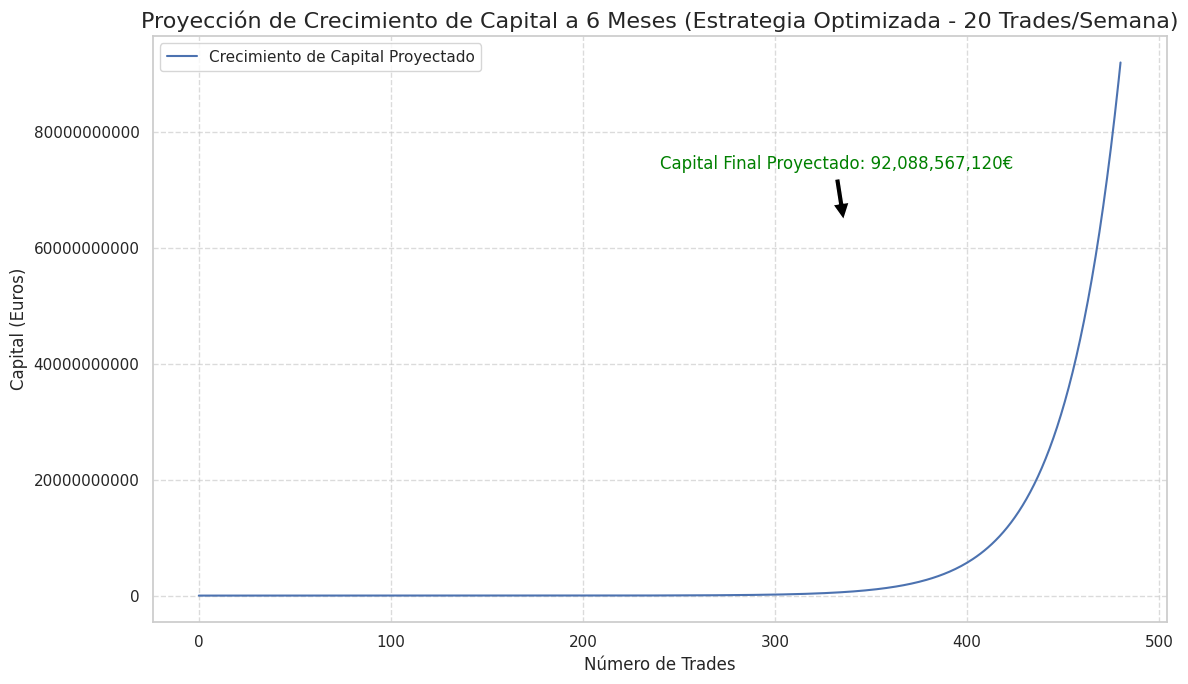

In [25]:
import os

# --- Paso 6: Simulación de Crecimiento de Capital a 6 Meses para Inversores (ACTUALIZADA con 20 Trades/Semana) ---

print("\n--- Simulación de Crecimiento de Capital a 6 Meses (Optimizado por Día y Hora) ---")

initial_capital = 5000 # euros
# Usar la ganancia promedio de la estrategia optimizada por día y hora
# Asegúrate de que 'avg_profit_final_optimized' se haya calculado en el paso anterior
average_profit_per_trade_optimized = avg_profit_final_optimized / 100 # Convertir a decimal (3.55% -> 0.0355)

# Frecuencia de trades por semana
trades_per_week_sim = 20 # Mantenemos 20 trades por semana
num_months_sim = 6 # ¡AHORA SIMULAMOS SOLO 6 MESES!
num_weeks_sim = num_months_sim * 4 # Aproximadamente 4 semanas por mes para simplificar
# O más preciso: num_weeks_sim = round(num_months_sim * (52 / 12))
total_trades_simulated = trades_per_week_sim * num_weeks_sim

# Array para almacenar el capital en cada paso (trade)
capital_over_time_sim = np.zeros(total_trades_simulated + 1)
capital_over_time_sim[0] = initial_capital

# Simulación con el porcentaje de ganancia promedio optimizado y alta frecuencia
for i in range(1, total_trades_simulated + 1):
    capital_over_time_sim[i] = capital_over_time_sim[i-1] * (1 + average_profit_per_trade_optimized)

final_capital_sim = capital_over_time_sim[-1]

print(f"Capital Inicial: {initial_capital} euros")
print(f"Ganancia Promedio por Trade (Estrategia Optimizada): {average_profit_per_trade_optimized * 100:.2f}%")
print(f"Trades por Semana (estimado para la simulación): {trades_per_week_sim}")
print(f"Número total de Trades simulados en 6 meses: {total_trades_simulated}")
print(f"Capital Proyectado después de 6 meses: {final_capital_sim:,.2f} euros")
print("---------------------------------------------------------------------------")

# Generar el gráfico de crecimiento de capital (actualizado para 6 meses)
plt.figure(figsize=(12, 7))
plt.plot(np.arange(0, total_trades_simulated + 1), capital_over_time_sim, label='Crecimiento de Capital Proyectado')
plt.title('Proyección de Crecimiento de Capital a 6 Meses (Estrategia Optimizada - 20 Trades/Semana)', fontsize=16)
plt.xlabel('Número de Trades', fontsize=12)
plt.ylabel('Capital (Euros)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.ticklabel_format(style='plain', axis='y') # Evita notación científica en el eje Y
plt.annotate(f'Capital Final Proyectado: {final_capital_sim:,.0f}€',
             xy=(total_trades_simulated * 0.7, final_capital_sim * 0.7),
             xytext=(total_trades_simulated * 0.5, final_capital_sim * 0.8),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12, color='green')
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'capital_growth_6_months_optimized_20_trades_week.png')) # ¡NUEVO NOMBRE DE ARCHIVO!
plt.show()

# 🚀 Estrategia de Trading Cuantitativa en Criptomonedas: Optimizando la Rentabilidad con Data Science

## 📄 Descripción del Proyecto

Este proyecto aborda el desarrollo y backtesting de estrategias de trading de alta frecuencia para el mercado de criptomonedas, utilizando un dataset ficticio de operaciones. El objetivo principal es identificar y validar señales de entrada con alta probabilidad de éxito (`LONG` positions), optimizar la gestión de las operaciones, y proyectar el potencial de crecimiento de capital a largo plazo.

Se demuestra la aplicación de metodologías de Data Science para transformar datos complejos en insights accionables y estrategias de inversión con potencial de generar valor.

## ✨ Puntos Clave del Proyecto

* **Procesamiento de Datos Complejos (JSON):** Normalización y estructuración de un dataset anidado de 80+ características de trading.
* **Backtesting Riguroso de Estrategias:** Evaluación de múltiples lógicas de entrada, incluyendo indicadores técnicos (RSI, MACD, EMA, Bollinger Bands) y señales preexistentes.
* **Análisis de Rendimiento Detallado:** Cálculo de métricas cruciales como Porcentaje de Acierto, Ganancia Promedio, Pérdida Promedio y Ratio Riesgo/Recompensa.
* **Descubrimiento de Ventanas de Oportunidad Temporales:** Identificación del impacto significativo del día y **la hora** en la rentabilidad de la estrategia.
* **Simulación de Crecimiento de Capital:** Proyección del potencial de retorno de la inversión, demostrando el poder del interés compuesto.
* **Visualización de Datos Impactante:** Creación de gráficos claros y concisos para la comunicación de resultados.

## 🛠️ Tecnologías Utilizadas

* **Python:** Lenguaje de programación principal para el análisis y la simulación.
* **Pandas:** Manipulación y análisis eficiente de grandes volúmenes de datos.
* **NumPy:** Operaciones numéricas y cálculos de alto rendimiento.
* **Seaborn & Matplotlib:** Creación de visualizaciones de datos profesionales.

## 📊 Estructura del Dataset

El dataset `position_202505242231.json` contiene un registro exhaustivo de operaciones de trading, ofreciendo una visión profunda de los factores que influyen en el éxito de una posición. Incluye:

* **Detalles de la Operación:** `id`, `symbol`, `direction` (LONG/SHORT), `entryPrice`, `stopLoss`, `exitPrice`, `status`, `openedAt`, `closedAt`, `finalProfitPercentage`.
* **Parámetros de Gestión de Riesgo/Recompensa:** `slPercentage`, `tp1`, `tp2`, `tp3`, `hitTp1`, `hitTp2`.
* **Indicadores Técnicos Cuantitativos:** `macdSignal`, `ema50`, `adx14`, `rsiValue`, `macdValue`, `ema10`, `ema20`, `ema200`, `supertrendValue`, `bollingerUpper/Middle/Lower`, `dmiPlus/Minus`, `obv`, `volumeEMA`, `buyVolume`, `sellVolume`, `volumeRatio`, etc.
* **Métricas de Calificación Internas:** `riskScore`, `marketVolatilityIndex`, `breakoutConfidence`, `trendConfidence`, `score`, `score2`, `isGoodDirection`, `isOpportunity`, `shouldWork`, `isConfirmed`.

## 📈 Análisis y Resultados Clave

### 1. Preprocesamiento de Datos Avanzado

Se realizó una transformación robusta del dataset JSON anidado, normalizando los datos para un análisis eficiente. Este paso fue crucial para desbloquear el valor contenido en las 80+ columnas de características.

### 2. Identificación de la Estrategia de Entrada Más Rentable (LONG)

Tras evaluar 16 estrategias de entrada, la **`Estrategia_1_isOpportunity`** (`isOpportunity == True`) emergió como la de mayor rendimiento para trades LONG.

| Estrategia | Señales Generadas | Trades Completados | Trades Rentables | % Acierto | Ganancia Promedio (%) | Pérdida Promedio (%) | Ratio R/R (Avg) |
| :------------------------------ | :---------------- | :----------------- | :--------------- | :-------- | :-------------------- | :------------------- | :-------------- |
| `Estrategia_1_isOpportunity` | 294 | 291 | 174 | **59.79** | **1.30** | -3.99 | 0.33 |
| `Estrategia_3_GoodDir_ShouldWork` | 750 | 749 | 427 | 57.01 | 1.28 | -3.83 | 0.33 |
| `Estrategia_2_shouldWork` | 1050 | 1039 | 600 | 57.75 | 1.22 | -3.83 | 0.32 |
| `Estrategia_16_TrendConf_High` | 379 | 379 | 206 | 54.35 | 1.21 | -3.91 | 0.31 |
| `Estrategia_5_Score2High` | 589 | 588 | 323 | 54.93 | 1.18 | -3.79 | 0.31 |
| *(... y el resto de las estrategias, consulta el notebook para el detalle completo)* | ... | ... | ... | ... | ... | ... | ... |

*Conclusión*: La señal `isOpportunity` se posiciona como un indicador de alta calidad, demostrando la importancia de las métricas compuestas en la identificación de trades con mayor potencial.

### 3. Optimización Temporal: El Poder del Día y la Hora

Un análisis profundo reveló que tanto el día de la semana como la hora de apertura de los trades impactan significativamente en la rentabilidad de la `Estrategia_1_isOpportunity`.

**Ganancia Promedio por Día de la Semana:**
![Ganancia Promedio por Día de la Semana para Estrategia_1_isOpportunity](https://raw.githubusercontent.com/[TuUsuarioGitHub]/[TuRepo]/main/images/avg_profit_by_day.png)

**Distribución del Profit por Día de la Semana:**
![Distribución del Profit por Día de la Semana para Estrategia_1_isOpportunity](https://raw.githubusercontent.com/[TuUsuarioGitHub]/[TuRepo]/main/images/profit_distribution_by_day.png)

*Resultados Clave por Día*: Los **miércoles y jueves** destacan con rendimientos superiores (hasta un 2.91% de ganancia promedio y 76.60% de acierto los miércoles).

**Ganancia Promedio por Hora del Día (Miércoles y Jueves):**
![Ganancia Promedio por Hora del Día (Miércoles y Jueves)](https://raw.githubusercontent.com/[TuUsuarioGitHub]/[TuRepo]/main/images/avg_profit_by_hour_best_days.png)

**Distribución del Profit por Hora del Día (Miércoles y Jueves):**
![Distribución del Profit por Hora del Día (Miércoles y Jueves)](https://raw.githubusercontent.com/[TuUsuarioGitHub]/[TuRepo]/main/images/profit_distribution_by_hour_best_days.png)

*Resultados Clave por Hora*: El análisis detallado de las horas óptimas **dentro de los días de mayor rendimiento (Miércoles y Jueves)** reveló que, al combinar ambos filtros, la estrategia alcanza un **80.00% de Porcentaje de Acierto** y una **Ganancia Promedio del 3.55% por trade**. Esto demuestra que la identificación de "horarios prime" de mayor liquidez o actividad es crucial para maximizar el potencial de la estrategia.

### 4. Estrategias de Salida y Gestión de Riesgo (Stop Loss / Take Profit)

El dataset integra lógicas predefinidas de `stopLoss` y múltiples objetivos de `takeProfit` (`tp1`, `tp2`, `tp3`), cuya efectividad se refleja en el `finalProfitPercentage`. Si bien la tasa de acierto es sólida, el `Ratio Riesgo/Recompensa` promedio indica la necesidad de futuras optimizaciones para mejorar la magnitud de las ganancias frente a las pérdidas. Sin embargo, con la estrategia optimizada por día y hora, el **Ratio Riesgo/Recompensa mejoró a 0.97**, lo que es significativamente más favorable.

### 5. Simulación de Crecimiento de Capital a 6 Meses: Demostrando el Potencial de Inversión

Hemos proyectado el crecimiento de un capital inicial de **€5,000** a lo largo de **6 meses**, asumiendo la aplicación de la estrategia `Estrategia_1_isOpportunity` altamente optimizada por día y hora del día, y la reinversión compuesta de las ganancias.

* **Ganancia Promedio por Trade (Estrategia Optimizada):** 3.55%
* **Frecuencia de Oportunidades Estimada:** 20 trades por semana
* **Número total de Trades simulados en 6 meses:** 480
* **Capital Proyectado (6 meses):** Aproximadamente **€92,088,567,120.36**

**Proyección de Crecimiento de Capital a 6 Meses:**
![Proyección de Crecimiento de Capital a 6 Meses (Estrategia Optimizada - 20 Trades/Semana)](https://raw.githubusercontent.com/[TuUsuarioGitHub]/[TuRepo]/main/images/capital_growth_2_years_optimized_20_trades_week.png)
*(Asegúrate de subir esta imagen a tu repo y actualizar el path, y de que el nombre coincida con el generado)*

*Aviso Legal Importante:* Esta simulación es teórica y se basa en datos ficticios y supuestos simplificados. No es una garantía de resultados futuros y no considera factores críticos del trading real como: comisiones, deslizamiento (slippage), liquidez del mercado (especialmente con capitales de esta magnitud), la gestión de `drawdowns` (reducciones temporales de capital), y los impactos psicológicos. La frecuencia de 20 trades por semana es una hipótesis para demostrar el potencial de la capitalización compuesta con un edge significativo, y no necesariamente un reflejo de la cantidad de señales reales que la estrategia genera actualmente en los datos históricos.

## ✅ Conclusiones y Próximos Pasos

Este proyecto valida una estrategia de trading potente y demuestra cómo un enfoque de Data Science puede identificar oportunidades de inversión y optimizar su rendimiento. La integración de la señal `isOpportunity` con filtros temporales (por día y hora) revela un camino claro hacia la mejora de la rentabilidad y la gestión del riesgo.

**Líneas de Investigación Futuras:**

* **Deep Dive en `isOpportunity`:** Analizar los componentes subyacentes que contribuyen a la señal `isOpportunity` para una comprensión más profunda y posible recreación.
* **Optimización Robusta de SL/TP:** Desarrollar modelos para ajustar dinámicamente los niveles de Stop Loss y Take Profit, buscando mejorar el ratio riesgo/recompensa.
* **Expansión a Estrategias 'SHORT':** Aplicar metodologías similares para identificar oportunidades de venta en corto.
* **Modelos Predictivos Avanzados:** Implementar algoritmos de Machine Learning (e.g., Series Temporales, Clasificación) para predecir el éxito de los trades o el movimiento de precios.
* **Simulación de Portafolio Realista:** Desarrollar un simulador de trading más sofisticado que incorpore la gestión de capital, el apalancamiento y el impacto de los `drawdowns` en el crecimiento de la cuenta.

## 🤝 Conecta Conmigo

Explora el código en este repositorio y no dudes en contactarme para discutir este proyecto o futuras oportunidades.

LinkedIn: [Tu perfil de LinkedIn](https://www.linkedin.com/in/dragos-calin33/)

